***Smoothing Filter***

<style>
    .jp-Notebook { background: white !important; color: black !important; }
    pre, code { background: white !important; color: black !important; }
</style>

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def smooth_filter(input_image):
  img = input_image.resize((400,400), Image.Resampling.LANCZOS)

  fig = plt.figure()
  fig.set_figheight(20)
  fig.set_figwidth(20)

  #plotting original image
  fig.add_subplot(1,2,1)
  plt.imshow(img, cmap='gray')
  plt.title('original')


  # convert to numpy array 
  numpy_image = np.array(img)
  # array for padding
  array_b = np.zeros((402,402))

  # to pad initial array with zeros in all side
  array_b[1:401,1:401] = numpy_image

  #defining filter
  filter_array = np.array([[1/9,1/9,1/9],
                         [1/9,1/9,1/9],
                         [1/9,1/9,1/9]])
  
  #creating empty list
  lst = []

  for i in range(400):
    for j in range(400):
      #extracting part of array equal to filter size
      array_c = array_b[i:(3+i),j:(3+j)]
    
     #applying filter
      array_mul = np.multiply(filter_array,array_c)
      array_sum = np.sum(array_mul)
    
      # putting calculated value in list
      lst.append(array_sum)

  # resizing lst to shape of original array
  final_array = np.resize(lst,(400,400))

  final_image = Image.fromarray(final_array)
  final_image= final_image.convert("L")

    #plotting filtered image
  fig.add_subplot(1,2,2)
  plt.imshow(final_image, cmap='gray')
  plt.title('filtered image')

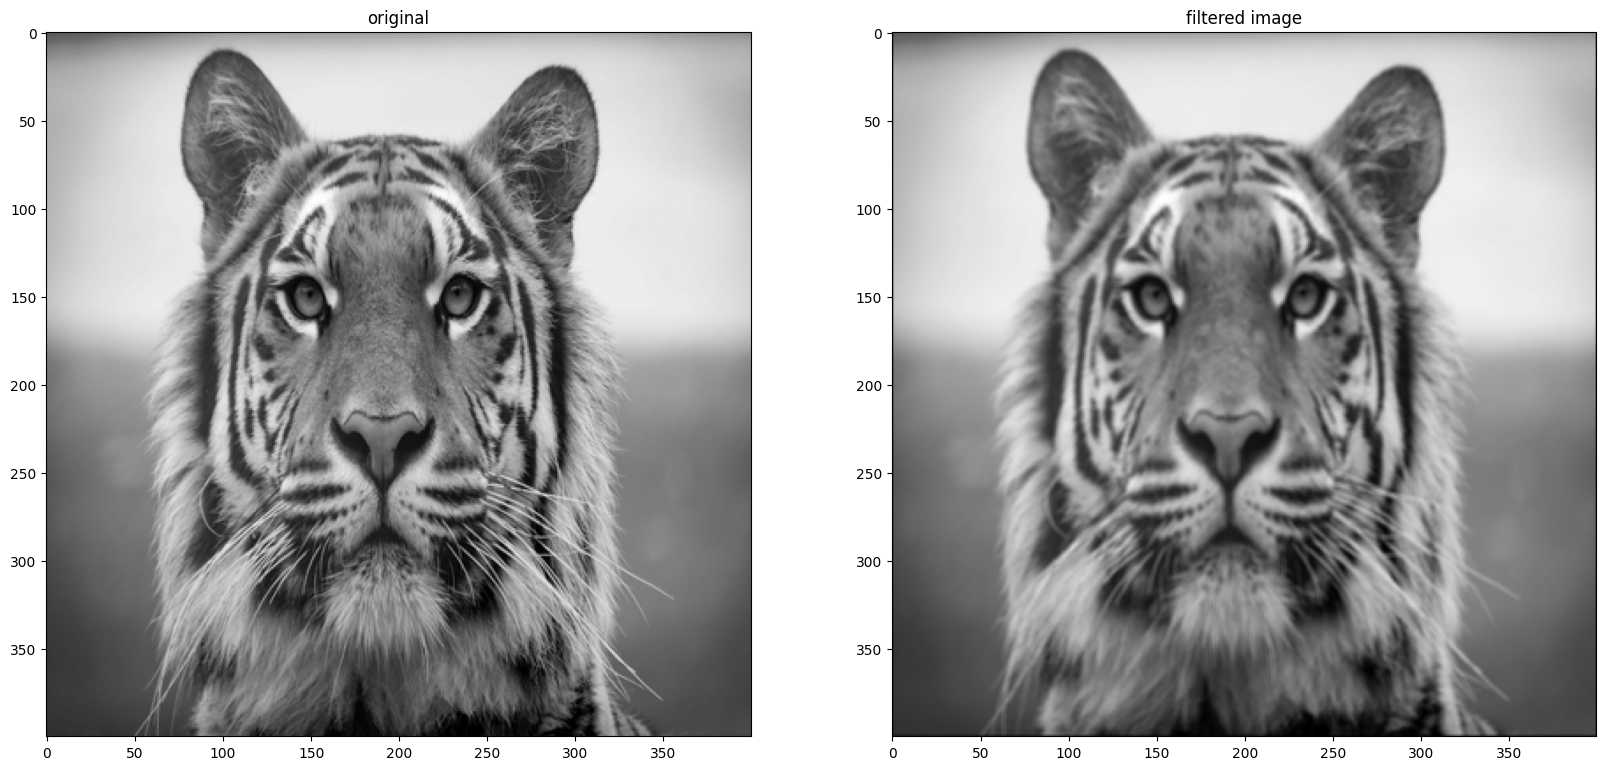

In [3]:
# reading image and converting to gray scale
img = Image.open('../images/tiger.jpg').convert('L')
# Calling smooth function 
smooth_filter(img)

In [4]:
def weighted_smooth_filter(input_image):
  img = input_image.resize((400,400), Image.Resampling.LANCZOS)

  fig = plt.figure()
  fig.set_figheight(20)
  fig.set_figwidth(20)

  #plotting original image
  fig.add_subplot(1,2,1)
  plt.imshow(img, cmap='gray')
  plt.title('original')

  # convert to numpy array 
  numpy_image = np.array(img)
  # array for padding
  array_b = np.zeros((402,402))

  # to pad initial array with zeros in all side
  array_b[1:401,1:401] = numpy_image

  #defining filter
  filter_array = np.array([[1/16,2/16,1/16],
                         [2/16,4/16,2/16],
                         [1/16,2/16,1/16]])  
  #creating empty list
  lst = []

  for i in range(400):
    for j in range(400):
      #extracting part of array equal to filter size
      array_c = array_b[i:(3+i),j:(3+j)]
    
     #applying filter
      array_mul = np.multiply(filter_array,array_c)
      array_sum = np.sum(array_mul)
    
      # putting calculated value in list
      lst.append(array_sum)

  # resizing lst to shape of original array
  final_array = np.resize(lst,(400,400))

  final_image = Image.fromarray(final_array)
  final_image= final_image.convert("L")

    #plotting filtered image
  fig.add_subplot(1,2,2)
  plt.imshow(final_image, cmap='gray')
  plt.title('filtered image')  

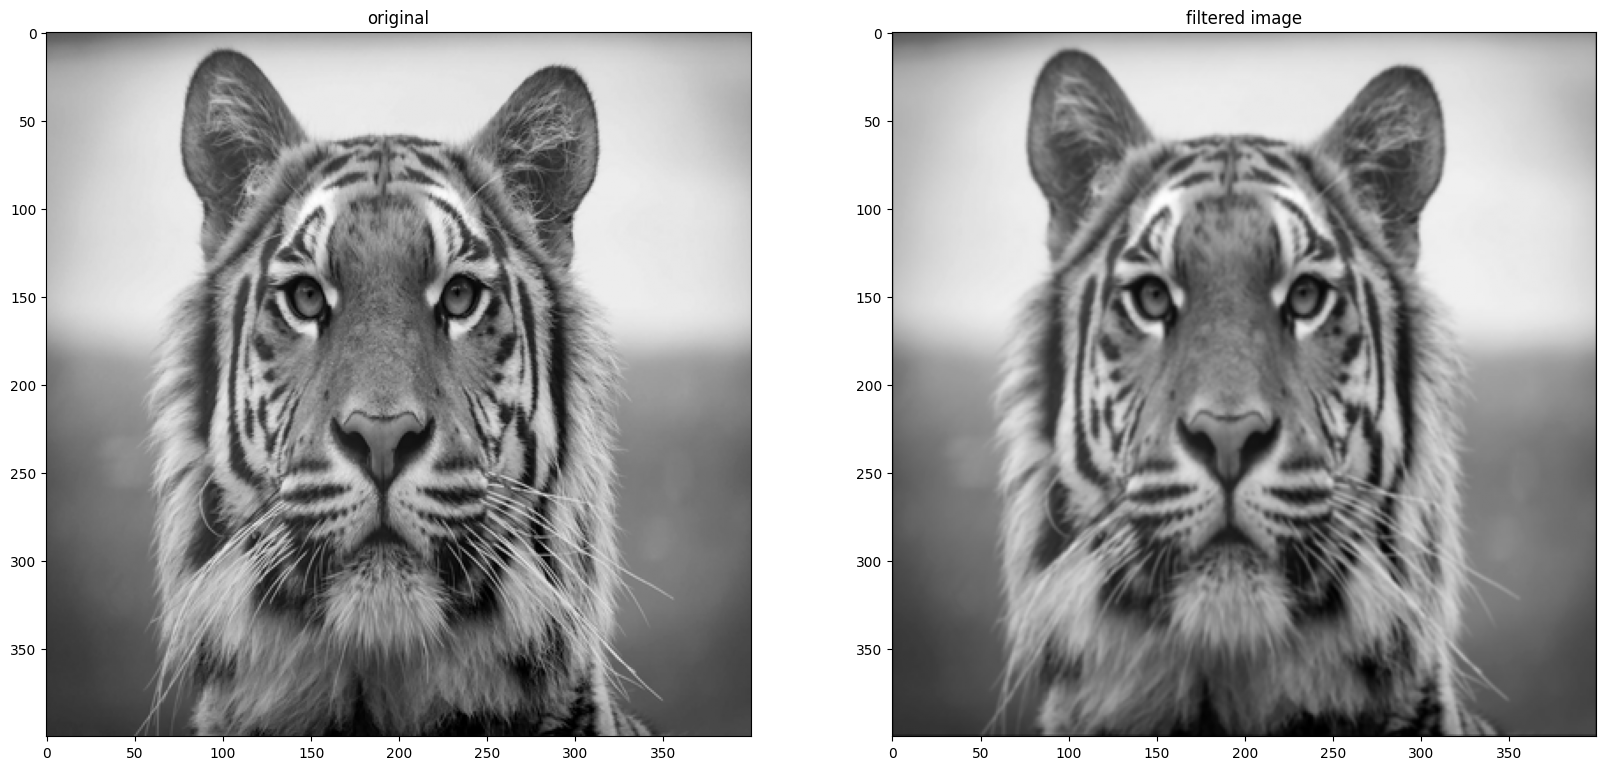

In [5]:
weighted_smooth_filter(img)